In [1]:
# 혹시나 필요할지도 모르는 것들
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# 불필요한 warning이 나오지 않도록 하는 곳
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# KNN을 사용
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# mnist 데이터셋을 불러오자
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


In [24]:
# train set과 test set을 분리해야 한다.
# train과 test set을 그냥 numpy형태로 다 바꿔서 귀찮게 하지 말자.
from sklearn.model_selection import train_test_split
mnist_data = mnist.data.to_numpy()
mnist_target = mnist.target.to_numpy()
# training set을 default setting으로 해서 해보자.
# training set을 줄여서 한번 해보자.
# training set을 늘려서 한번 해보자. 
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_target, train_size=0.9, random_state=0)
# 잘 나뉘었는가 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63000, 784)
(7000, 784)
(63000,)
(7000,)


In [25]:
# training data를 이용해 KNN 모델을 만들기
# default 값은 5이다.
# knn은 학습에 시간이 거의 안걸리고 n_neighbors 수에만 영향을 받으니까 for list로 만들어놓은 다음에 한꺼번에 비교를 해보자
# 계속 과적합이 나는 모델이 제일 정확도가 높은데??? // train set을 좀 줄인 버전과 좀 늘린 버전을 가지고 테스트 할 필요가 있다.

In [26]:
# 예측을 잘 하는가? >> 역시 lazy model. 예측할 때 시간이 오래 걸리는구먼

knn_models = []
knn_train_score = []
knn_test_score = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    trainScore = knn.score(X_train, y_train)
    testScore = knn.score(X_test, y_test)
    knn_models.append(knn)
    knn_train_score.append(trainScore)
    knn_test_score.append(testScore)
    print("accuracy of n_neighbor {} calculated".format(i))

accuracy of n_neighbor 1 calculated
accuracy of n_neighbor 2 calculated
accuracy of n_neighbor 3 calculated
accuracy of n_neighbor 4 calculated
accuracy of n_neighbor 5 calculated
accuracy of n_neighbor 6 calculated
accuracy of n_neighbor 7 calculated
accuracy of n_neighbor 8 calculated
accuracy of n_neighbor 9 calculated
accuracy of n_neighbor 10 calculated


In [27]:
# train score와 test score를 출력하자
for n, trainScore, testScore in zip(range(1,len(knn_models)+1),knn_train_score, knn_test_score):
    print("n_neighbors : {} / train accuracy : {} / test accuracy : {} \n".format(n, trainScore, testScore))


n_neighbors : 1 / train accuracy : 1.0 / test accuracy : 0.9738571428571429 

n_neighbors : 2 / train accuracy : 0.9853174603174604 / test accuracy : 0.9714285714285714 

n_neighbors : 3 / train accuracy : 0.9861269841269841 / test accuracy : 0.9754285714285714 

n_neighbors : 4 / train accuracy : 0.9823968253968254 / test accuracy : 0.9745714285714285 

n_neighbors : 5 / train accuracy : 0.9816825396825397 / test accuracy : 0.9758571428571429 

n_neighbors : 6 / train accuracy : 0.9792698412698413 / test accuracy : 0.9735714285714285 

n_neighbors : 7 / train accuracy : 0.9783333333333334 / test accuracy : 0.975 

n_neighbors : 8 / train accuracy : 0.9767142857142858 / test accuracy : 0.9737142857142858 

n_neighbors : 9 / train accuracy : 0.9762857142857143 / test accuracy : 0.9724285714285714 

n_neighbors : 10 / train accuracy : 0.9751746031746031 / test accuracy : 0.9714285714285714 



#### train set의 크기에 따른 정확도
##### default값인 0.75일때
train set의 크기를 기본값으로 했을 때는 n_neighbor가 1, 3일때 test set의 예측치가 0.971로 가장 좋았다. 
n_neighbor가 1일때는 train accuracy가 과적합 상태이지만 n_neighbor=3일때는 과적합 상태가 아니다.
##### 0.5 일때
train set을 0.5일때 또한 1, 3일때 test set의 예측치가 0.967로 가장 높았다.
그리고 1일때는 과적합, 3일때는 과적합은 아니다. 
##### 0.9일때
5에서 예측치가 0.976으로 가장 높았다. 또한 train set accuray가 0.981로 과적합 상태 또한 아니다.
##### 결론
train set을 0.9로 하고 n_neighbor = 5일때 test set accuracy가 0.976으로 가장 좋은 결과가 나왔다.

prediction with plot // n_neighbors : 5
prediction 1 : 2
prediction 2 : 1
prediction 3 : 7
prediction 4 : 1
prediction 5 : 0
prediction 6 : 2
prediction 7 : 5
prediction 8 : 5
prediction 9 : 0
prediction 10 : 1


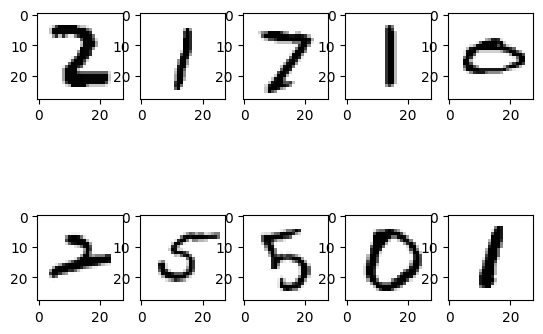

In [28]:
# test set에서 랜덤하게 10개를 뽑은 후 이를 출력해서 예측값과 실제 값이 맞는지 틀린지 확인해보자
# 각 knn에 대해서도 출력을 한다.
rand_index = np.random.randint(low=0, high=len(X_test), size=10)

Nneighbor = 5
knn = knn_models[Nneighbor]
print("prediction with plot // n_neighbors : {}".format(Nneighbor))
for randin, i in zip(rand_index, range(1,len(rand_index)+1)):
    predict = X_test[randin].reshape(1,-1)
    print("prediction {} : {}".format(i,knn.predict(predict)[0]))
    plt.subplot(2,5,i)
    plt.imshow((X_test[randin].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
